In [5]:
os.path.abspath('')
root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(root_path)

import pandas as pd
import numpy as np
import os, sys
from flask import Flask, render_template, redirect, request, jsonify 
import time
import missingno
import random
import json
import seaborn as sns
import matplotlib.pyplot  as plt

In [6]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(url)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [7]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [8]:
data.shape

(35083, 36)

In [9]:
#Filtering our countries from dataset
Data_all_countries = data[(data.location == "Spain") | (data.location == "Iran") | (data.location == "Netherlands") | (data.location == "Mexico") | (data.location == "Brazil")]

In [10]:
Data_all_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
4526,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
4527,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
4528,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
4529,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
4530,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29642,ESP,Europe,Spain,2020-08-01,288522.0,0.0,28445.0,0.0,6170.962,0.000,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
29643,ESP,Europe,Spain,2020-08-02,288522.0,0.0,28445.0,0.0,6170.962,0.000,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
29644,ESP,Europe,Spain,2020-08-03,297054.0,8532.0,28472.0,27.0,6353.446,182.484,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
29645,ESP,Europe,Spain,2020-08-04,302814.0,5760.0,28498.0,26.0,6476.642,123.196,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


In [11]:


"""Now that we have the dataset with the information of only the necessary countries. We will further clean the data with by looking at the following things:
1.Check the types of the columns and changing the date column to a datetime64 type and setting it as our index.

2.Checking the data for any Nan values.

3.Checking for duplicates in the data.

4.Dropping irrelevant columns

First we will start checking the types and specifcally the type of the date column."""

Data_all_countries.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1099 entries, 4526 to 29646
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         1099 non-null   object 
 1   continent                        1099 non-null   object 
 2   location                         1099 non-null   object 
 3   date                             1099 non-null   object 
 4   total_cases                      1091 non-null   float64
 5   new_cases                        1091 non-null   float64
 6   total_deaths                     1091 non-null   float64
 7   new_deaths                       1091 non-null   float64
 8   total_cases_per_million          1091 non-null   float64
 9   new_cases_per_million            1091 non-null   float64
 10  total_deaths_per_million         1091 non-null   float64
 11  new_deaths_per_million           1091 non-null   float64
 12  new_tests       

In [12]:
#Changing date to datetime64 type and setting as index, saving the data in a new variable: data_covid which we will further continue to use.

Data_all_countries.date = pd.to_datetime(Data_all_countries.date) 
data_covid = Data_all_countries.set_index("date")
data_covid

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,ESP,Europe,Spain,288522.0,0.0,28445.0,0.0,6170.962,0.000,608.387,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-08-02,ESP,Europe,Spain,288522.0,0.0,28445.0,0.0,6170.962,0.000,608.387,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
2020-08-03,ESP,Europe,Spain,297054.0,8532.0,28472.0,27.0,6353.446,182.484,608.964,...,13.799,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56



Preview of data with null values:


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88


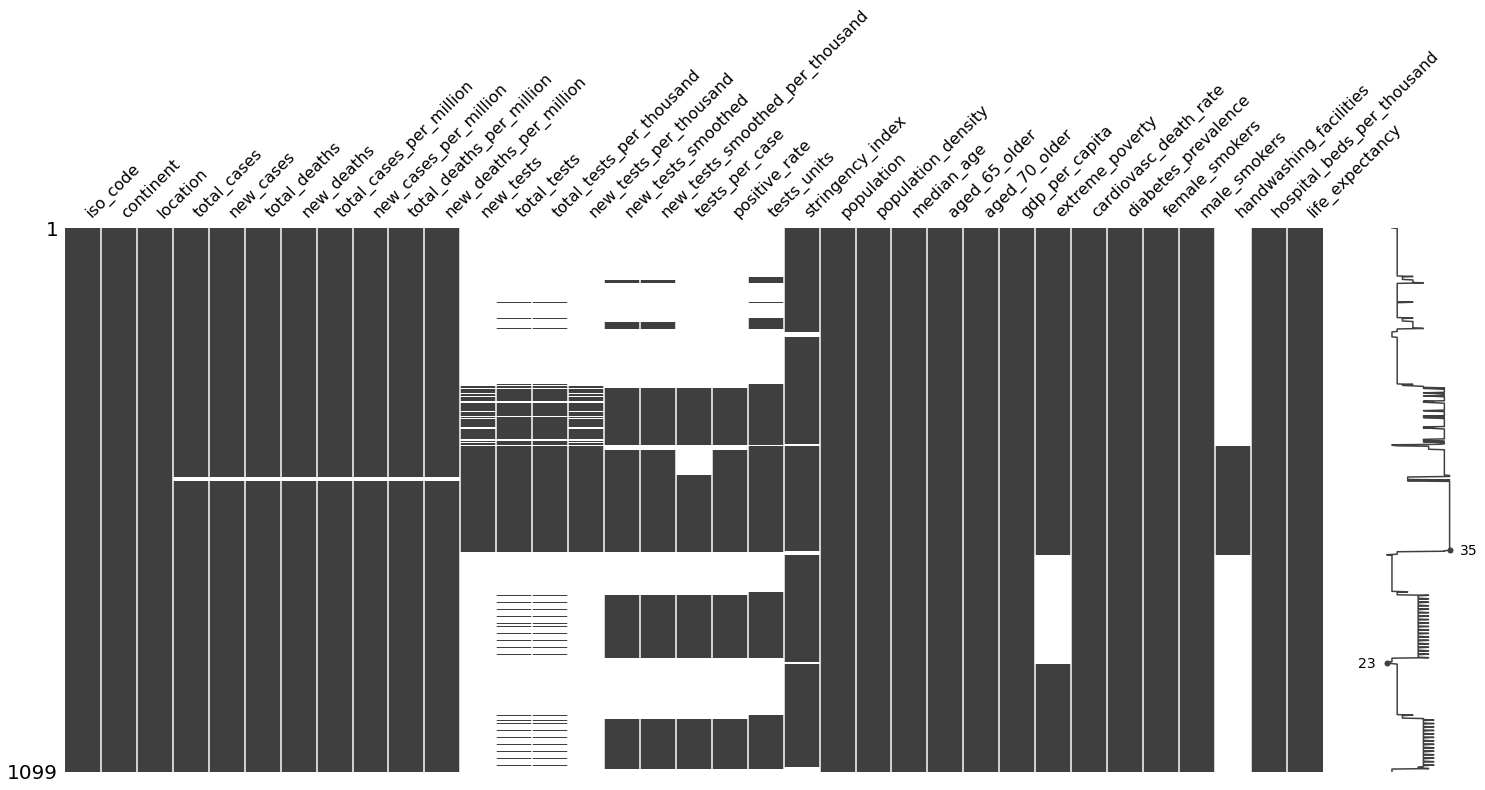

In [13]:
"""Now we will continue having a look at the missing values."""

# generate preview of entries with null values. The white spaces demonstrate missing data.
if len(data_covid[data_covid.isnull().any(axis=1)] != 0):
    print("\nPreview of data with null values:")
    display(data_covid[data_covid.isnull().any(axis=1)].head(3))
    missingno.matrix(data_covid)
    plt.show()



In [14]:
"""As we can see from the previews above, there are quite some columns with missing data (NaN data). We have decided to remove all the columns regarding "test" as there is not enough information to actually draw conlusions. The same goes for the "stringecy_index", "extreme_poverty" and the "handwashing facilities column"."""

'As we can see from the previews above, there are quite some columns with missing data (NaN data). We have decided to remove all the columns regarding "test" as there is not enough information to actually draw conlusions. The same goes for the "stringecy_index", "extreme_poverty" and the "handwashing facilities column".'

In [15]:
#Removing the columns with too many NaN values:
data_covid.drop(["new_tests", "total_tests", "total_tests_per_thousand", "new_tests_per_thousand", "tests_units", "new_tests_smoothed", "new_tests_smoothed_per_thousand", "stringency_index", "extreme_poverty", "handwashing_facilities"], axis=1, inplace=True)

In [16]:
"""Now that we have checked the missing values, we will continue with the duplicated values."""

#generate count statistics of duplicate entries

if len(data_covid[data_covid.duplicated()]) > 0:
    print("\n***Number of duplicated entries: ", len(data_covid[data_covid.duplicated()]))
    display(data_covid[data_covid.duplicated(keep=False)].sort_values(by=list(data_covid.columns)).head())
else:
    print("\nNo duplicated entries found")



***Number of duplicated entries:  278


,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-01,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-02,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-03,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88
2020-01-04,BRA,South America,Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.5,8.552,5.06,14103.452,177.961,8.11,10.1,17.9,2.2,75.88


In [17]:
"""We can see that there are quite some duplicated values. This was to be expected as already all the dates from last year of the cases will be 0 as the Corona virus then was not (as) active yet. We have decided to delete the duplicated values to clean the dataframe and have a clearer overview when visualizing the data."""

'We can see that there are quite some duplicated values. This was to be expected as already all the dates from last year of the cases will be 0 as the Corona virus then was not (as) active yet. We have decided to delete the duplicated values to clean the dataframe and have a clearer overview when visualizing the data.'

In [18]:
#removing duplicated values. ## TODO maybe change this?? not sure if we want to remove all the duplicates?
data_covid.drop_duplicates(inplace=True)

In [19]:
"""Now that the dataset is already quite clean and ready to be used and analised, we will finally have a citical look at the columns within our dataset to see if we really need all of them."""

data_covid.columns



Index(['iso_code', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'tests_per_case', 'positive_rate',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'hospital_beds_per_thousand', 'life_expectancy'],
      dtype='object')

In [20]:
"""As it is important to only delete the columns that we know for certain that do not have added value for our data study we will for now only remove: 'iso_code', 'continent', 'gdp_per_capita', 'life_expectancy', 'cardiovasc_death_rate' and 'diabetes_prevalence'."""

"As it is important to only delete the columns that we know for certain that do not have added value for our data study we will for now only remove: 'iso_code', 'continent', 'gdp_per_capita', 'life_expectancy', 'cardiovasc_death_rate' and 'diabetes_prevalence'."

In [21]:
#removing the columns that have irrelevant data for our study. # TODO have a look if we want to remove other columns as well. Depends on what we are actually analising.. hypothesis?
data_covid.drop(['iso_code', 'continent','gdp_per_capita','life_expectancy', 'cardiovasc_death_rate', 'diabetes_prevalence'], axis=1, inplace=True)

In [25]:
"""Iran"""

#Filtering the dataset for the data of Iran.
iran = data_covid[data_covid.location == "Iran"

SyntaxError: unexpected EOF while parsing (<ipython-input-25-16879e1293d2>, line 4)

In [23]:
iran


NameError: name 'iran' is not defined

In [24]:
#Plotting the curves of the new cases and deaths and the total cases and deaths, showing vertically the start date of the alarm state. 
ir = iran[["new_cases", "new_deaths"]].plot()
ir.axvline(pd.to_datetime('2020-03-25'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("The Iran´s daily deaths and new cases")
plt.legend()

ir = iran[["total_cases", "total_deaths"]].plot()
ir.axvline(pd.to_datetime('2020-03-25'), color='r', linestyle='--', lw=2, label='Start lockdown')
plt.title("The Iran´s total deaths and new cases")
plt.legend()


NameError: name 'iran' is not defined

On March 25th, Iran started the first exceptional measures and some of them are still being enforced until today. The alarm state in Iran conveys local measures like the prohibition to move from one province to another since March 25th, but they didn't include a home lockdown or to totally stop all social and economical activities. Gradually, these measures have been relaxing over the time in order to slow down the pandemic but some of them are still being enforced.

In April, Iran began to ease its restrictions as daily infections fell:

    20 April: Shopping malls and bazaars reopened and travel resumed between different provinces
    22 April: Public parks and recreation areas reopened
    12 May: Government allowed all mosques to reopen
    25 May: Major Shia religious shrines reopened
    26 May: Restaurants, cafes, museums and historical sites reopened

As we can prove, the measures taken to stop the pandemic had an effect in the very next days, as the contagious cases diminished. The relaxation taken from April 20th has been liked to the number of new contagious cases. The most noticeable peak overlaps with the permission to re-open restaurants, coffee shops, tourism locations and places of religious worship.

It exists an strong informative barrier, which can't discard a possible manipulation of the data, on the government's behalf. Due to it, it's advised to take this date with precaution . According to BBC information on August 3th of 2020, the real number of contagious cases and deaths related to Covid -19 could quadruplicate the official numbers.  


https://www.bbc.com/news/world-middle-east-51930856
https://www.bbc.com/news/world-middle-east-53598965

It is visible on the daily deaths Covid related's graphic, a negative amount that matches an adjustment on wrongfuly death related Covid-19 cases.


